In [1]:
# пример классификации - попытаемся вычислить код события по другим признакам

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [18]:
# импорт
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (C:\Users\ikzn\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [2]:
# получение данных

# датафрейм
df = pd.read_csv('../data/gdelt_2019_12_31_first_500.csv', delimiter=',', index_col = 'INDEX');

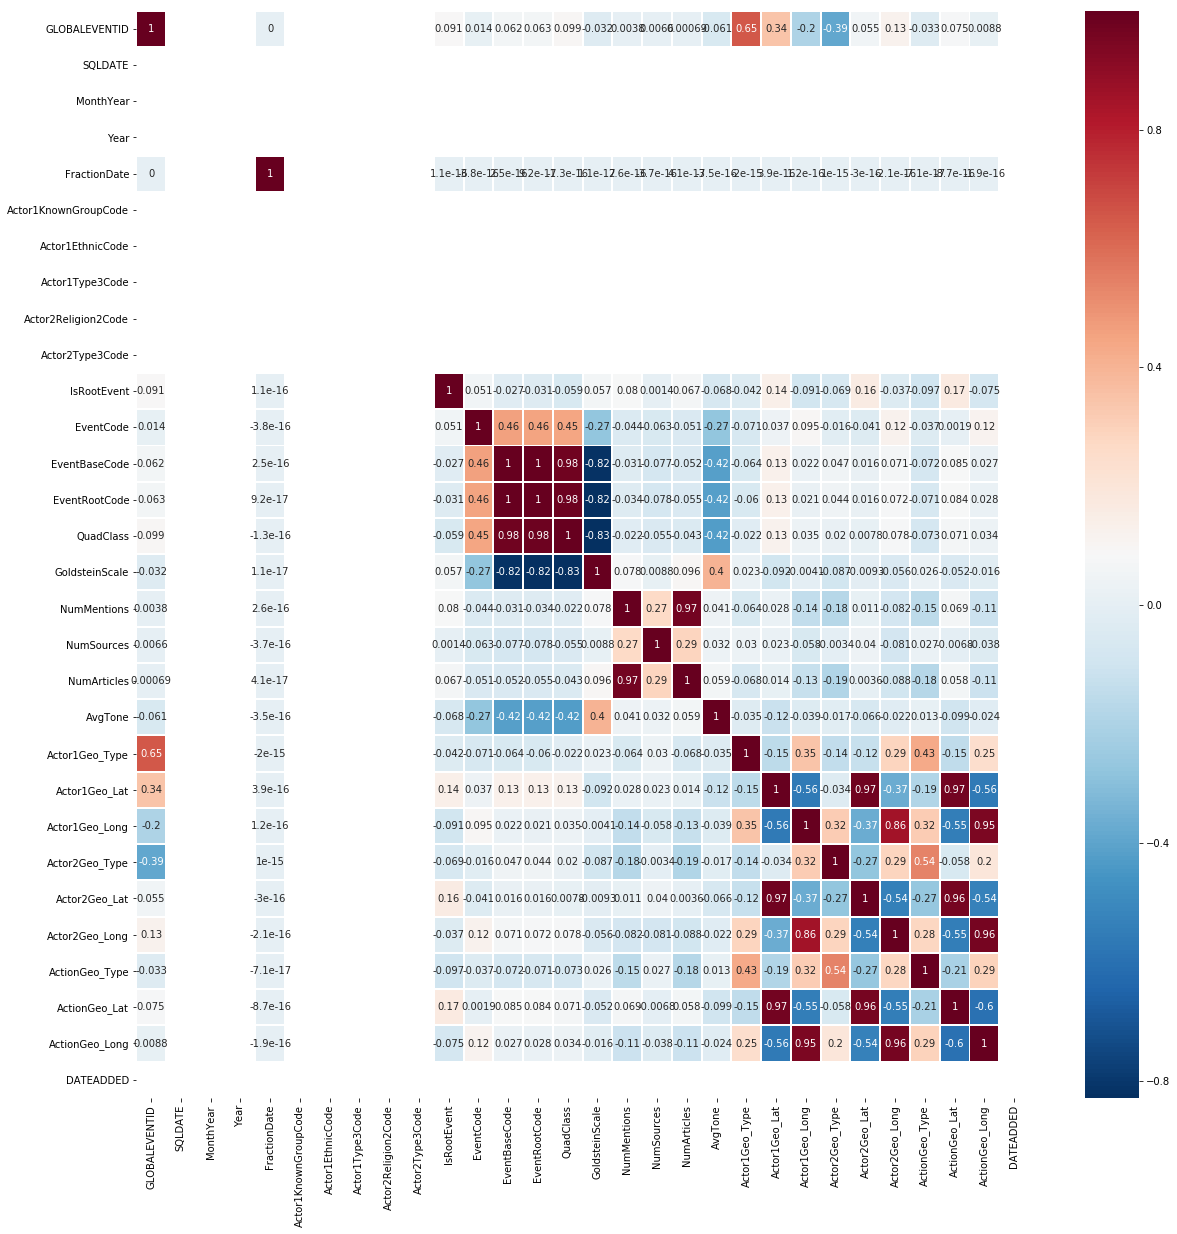

In [3]:
#посмотрим на корреляцию
pearsoncorr = df.corr()

fig, ax = plt.subplots(figsize=(20,20))

#и выведем сам график
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            ax=ax,
            linewidth=0.9)

In [4]:
y = df['EventCode']

# как можно заметить по таблице выше наибольшая корреляция достигается с параметрами 'QuadClass' и 'GoldsteinScale'
# оставим только их для анализа
X = pd.get_dummies(df[['QuadClass','GoldsteinScale']])

In [5]:
# разобьем на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

In [6]:
# обучим разными методами и посчитаем среднюю точность

# логистическая регрессия
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto', max_iter=100000).fit(X_train, y_train)
print('Логистическая регрессия:',round(LR.score(X_test,y_test), 4))

# случайный лес с 1000 деревьями глубиной 30
RF = RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=0).fit(X_train, y_train)
print('Случайный лес:',round(RF.score(X_test, y_test), 4))

# метод опорных векторов
SVM = svm.SVC(decision_function_shape="ovo",gamma='auto').fit(X_train, y_train)
print('Метод опорных векторов:',round(SVM.score(X_test, y_test), 4))

# нейронная сеть с скрытым слоем на 150 нейронов
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150,), random_state=1).fit(X_train, y_train)
print('Многослойный персептрон',round(NN.score(X_test, y_test), 4))

Логистическая регрессия: 0.375
Случайный лес: 0.765
Метод опорных векторов: 0.63
Многослойный персептрон 0.735


In [7]:
# можно увидеть, что по по глобальному классу события и его влиянию на мировую стабильность
# в достаточно большой мере можно определить тип события

In [ ]:
# для одноклассовой посмотрим на полноту и точность у разных алгоритмов

In [23]:
y = df['EventCode'] == 42

# разобьем на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

# логистическая регрессия
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto', max_iter=100000).fit(X_train, y_train)
y_test_predict_lr = LR.predict(X_test)
print('Логистическая регрессия:',round(LR.score(X_test,y_test), 4))

# случайный лес с 1000 деревьями глубиной 30
RF = RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=0).fit(X_train, y_train)
y_test_predict_rf = RF.predict(X_test)
print('Случайный лес:',round(RF.score(X_test, y_test), 4))

# метод опорных векторов
SVM = svm.SVC(decision_function_shape="ovo",gamma='auto').fit(X_train, y_train)
y_test_predict_svm = SVM.predict(X_test)
print('Метод опорных векторов:',round(SVM.score(X_test, y_test), 4))

# нейронная сеть с скрытым слоем на 150 нейронов
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150,), random_state=1).fit(X_train, y_train)
y_test_predict_nn = NN.predict(X_test)
print('Многослойный персептрон',round(NN.score(X_test, y_test), 4))

Логистическая регрессия: 0.935
Случайный лес: 1.0
Метод опорных векторов: 1.0
Многослойный персептрон 1.0


In [19]:
# попробуем посмотреть на полноту и точность у разных алгоритмов
precision, recall, thresholds = precision_recall_curve(y_test, y_test_predict_lr)
# disp = plot_precision_recall_curve(LR, X_test, y_test)
# disp.ax_.set_title('2-class Precision-Recall curve: '
#                    'AP={0:0.2f}'.format(average_precision))

In [24]:
thresholds

array([False])

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (C:\Users\ikzn\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)